<a href="https://colab.research.google.com/github/cuongle2002/AI-/blob/main/AL_week4_25_2_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


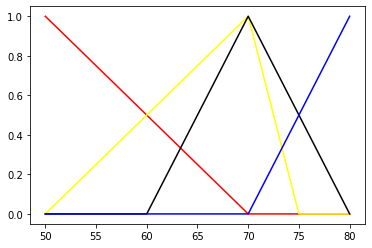

In [ ]:
import numpy as np
import skfuzzy as fuzz 
import matplotlib.pyplot as plt

x = np.arange(50,81,1)
slow = fuzz.trimf(x,[50,50,70])
medium = fuzz.trimf(x,[50,70,75])
medium_fast = fuzz.trimf(x,[60,70,80])
full_speed = fuzz.trimf(x,[70,80,90])

plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x, medium,'yellow',linewidth=1.5,label='medium')
plt.plot(x, medium_fast, 'black',linewidth=1.5, label='medium_fast')
plt.plot(x, full_speed, 'blue',linewidth=1.5, label='full_speed')


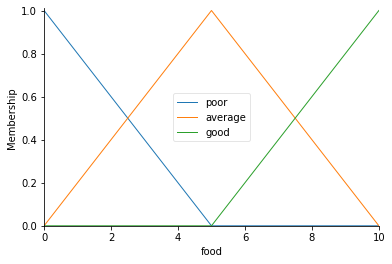

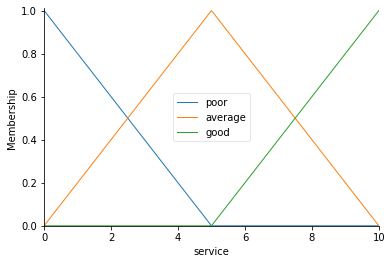

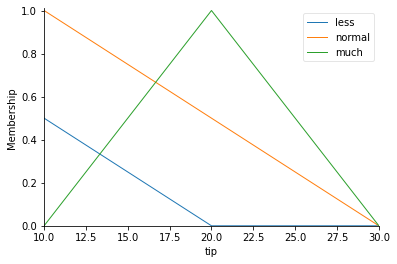

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1), 'food')
service = ctrl.Antecedent(np.arange(0,11,1), 'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe, [5,10,10])
service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10] )
service['good'] = fuzz.trimf(service.universe, [5,10,10])
tip['less'] = fuzz.trimf(tip.universe,[0,0,20])
tip['normal'] = fuzz.trimf(tip.universe,[0,10,30])
tip['much'] = fuzz.trimf(tip.universe, [10,20,30])
food.view()
service.view()
tip.view()

19.782945736434108


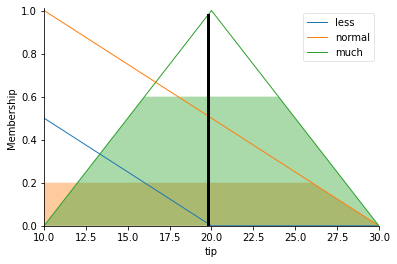

In [ ]:
rule1 = ctrl.Rule(food['poor'] & service['poor'],tip['less'])
rule2 = ctrl.Rule(food['average']& service['poor'], tip['less'])
rule3 = ctrl.Rule(food['good'] & service['poor'], tip['normal'])
rule4 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule5 = ctrl.Rule(food['average'] & service['average'], tip['normal'])
rule6 = ctrl.Rule(food['good'] & service['average']  , tip['much'])
rule7 = ctrl.Rule(food['poor'] & service['good'], tip['normal'])     
rule8 = ctrl.Rule(food['average'] & service['good'], tip['much'])
rule9 = ctrl.Rule(food['good'] & service['good'], tip['much'])


tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 9
tipping.input['service'] = 7
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)

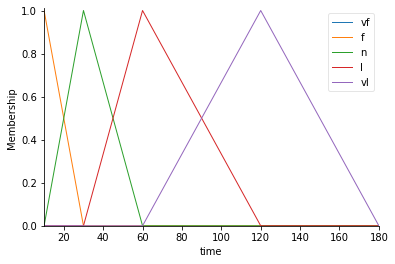

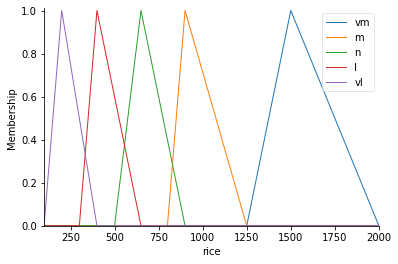

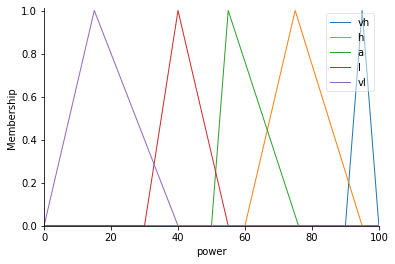

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10,181,1), 'time')
rice = ctrl.Antecedent(np.arange(100, 2001,1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')
time['vf'] = fuzz.trimf(time.universe,[0,0,10])
time['f'] = fuzz.trimf(time.universe,[0,10,30])
time['n'] = fuzz.trimf(time.universe,[10,30,60])
time['l'] = fuzz.trimf(time.universe,[30,60,120])
time['vl'] = fuzz.trimf(time.universe,[60,120,180])

rice['vm'] = fuzz.trimf(rice.universe, [1250,1500,2000])
rice['m'] = fuzz.trimf(rice.universe, [800,900,1250])
rice['n'] = fuzz.trimf(rice.universe, [500,650,900])
rice['l'] = fuzz.trimf(rice.universe, [300,400,650])
rice['vl'] = fuzz.trimf(rice.universe, [100,200,400])

power['vh'] = fuzz.trimf(power.universe, [90,95,100])
power['h'] = fuzz.trimf(power.universe, [60,75,95])
power['a'] = fuzz.trimf(power.universe, [50,55,76])
power['l'] = fuzz.trimf(power.universe, [30,40,55])
power['vl'] = fuzz.trimf(power.universe, [0,15,40])



time.view()
rice.view()
power.view()




In [ ]:
rule1 = ctrl.Rule(time['vf'] & rice['vl'],power['a'])
rule2 = ctrl.Rule(time['f'] & rice['vl'],power['l'])
rule3 = ctrl.Rule(time['n'] & rice['vl'],power['a'])
rule4 = ctrl.Rule(time['l'] & rice['vl'],power['h'])
rule5 = ctrl.Rule(time['vl'] & rice['vl'],power['h'])

rule6 = ctrl.Rule(time['vf'] & rice['l'],power['l'])
rule7 = ctrl.Rule(time['f'] & rice['l'],power['l'])
rule8 = ctrl.Rule(time['n'] & rice['l'],power['l'])
rule9 = ctrl.Rule(time['l'] & rice['l'],power['h'])
rule10 = ctrl.Rule(time['vl'] & rice['l'],power['vh'])

rule11 = ctrl.Rule(time['vf'] & rice['n'],power['h'])
rule12= ctrl.Rule(time['f'] & rice['n'],power['h'])
rule13 = ctrl.Rule(time['n'] & rice['n'],power['a'])
rule14 = ctrl.Rule(time['l'] & rice['n'],power['l'])
rule15 = ctrl.Rule(time['vl'] & rice['n'],power['vl'])

rule16 = ctrl.Rule(time['vf'] & rice['m'],power['vh'])
rule17 = ctrl.Rule(time['f'] & rice['m'],power['h'])
rule18 = ctrl.Rule(time['n'] & rice['m'],power['a'])
rule19 = ctrl.Rule(time['l'] & rice['m'],power['a'])
rule20 = ctrl.Rule(time['vl'] & rice['m'],power['l'])

rule21 = ctrl.Rule(time['vf'] & rice['vm'],power['vh'])
rule22 = ctrl.Rule(time['f'] & rice['vm'],power['vh'])
rule23 = ctrl.Rule(time['n'] & rice['vm'],power['h'])
rule24 = ctrl.Rule(time['l'] & rice['vm'],power['a'])
rule25 = ctrl.Rule(time['vl'] & rice['vm'],power['a'])






tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['time'] = 50
tipping.input['rice'] = 600
tipping.compute()
print(tipping.output['power'])
tip.view(power = tipping)

NameError: ignored

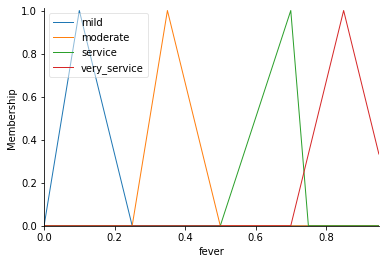

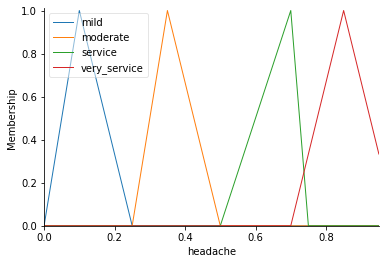

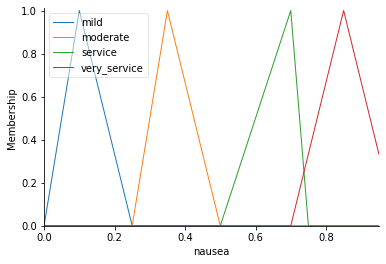

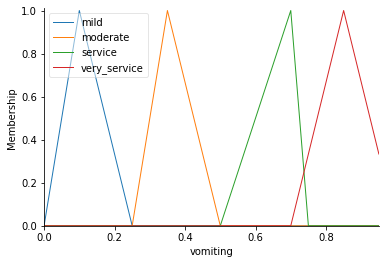

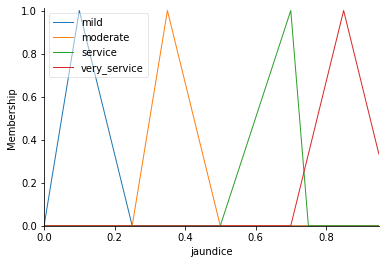

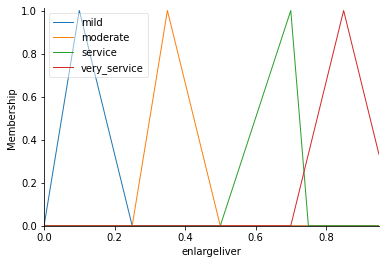

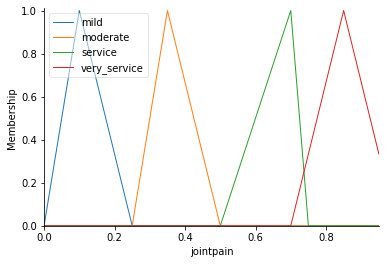

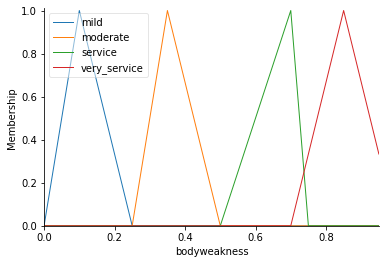

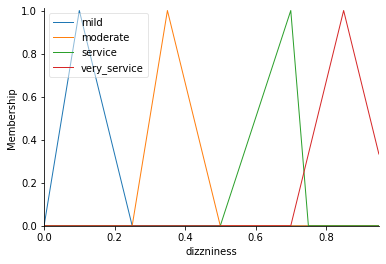

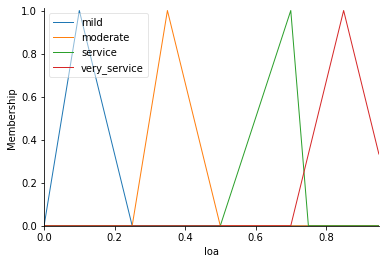

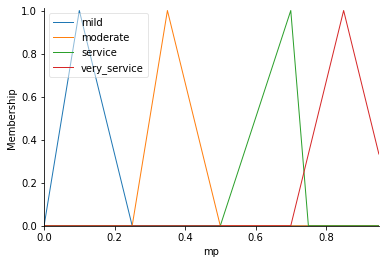

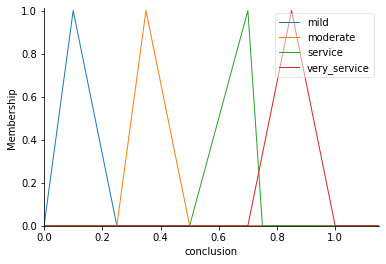